# Microsoft Movie Analysis
## **Authors:** Winny Chemusian
***

## Overview

#### Microsoft have decided to create a new movie studio and require to know which types of movies are doing best in the box office.This project analyzes using decriptive analysis on data from IMDb website to get an understanding ofwhich genres of movies did best. 
#### The datasets used for this analysis are three to gain understanding on the genres that topped the domestic gross sales, foreign gross sales, had the top average ratings and number of votes. 

## Business Problem

#### Microsoft wants to venture into movie production, they want to know what type of movies are the most successful and with the most sales to earn more profits. To help answer this problem the data used for this analysis is domestic and foreign sales to see the movies with the highest sales and the average rating and number of votes to check their popularity.

## Data

#### The data used is from the IMDb website.I used 3 files from IMDb to answer the question of which genres were most successful, mainly focusing on the Domestic and Foreign Gross sales along with average ratings given and number of votes received.

## Data Understanding

### Importing our Libraries

In [102]:
#Importing the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

### Loading the Dataset 

In [103]:
#Loading the data 
basics_df = pd.read_csv("imdb.title.basics.csv.gz")
ratings_df = pd.read_csv("imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("bom.movie_gross.csv.gz")

### Merging the dataset

In [104]:
#Merging data frames for basics and ratings because they have a common column(tconst)
merged_df1 = pd.merge(basics_df, ratings_df, on = 'tconst', how = 'right')
merged_df1.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [105]:
#Checking the shape after merging the dataframe
merged_df1.shape

(73856, 8)

In [106]:
#Renaming the column title in bom_movie_gross dataframe  to primary title  to be able to merge with the merged_df1
movie_gross_df.rename(columns = {'title':'primary_title'}, inplace = True)
movie_gross_df.head(5)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [107]:
#Merging the bom_movie_cross_df with the merged_df to obtain one dataframe
df = merged_df1.merge(movie_gross_df, on = 'primary_title', how = 'right')
df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,NaN,BV,334200000.0,691300000,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,NaN,WB,296000000.0,664300000,2010
3,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,P/DW,238700000.0,513900000,2010


### Previewing and understanding the data set

In [108]:
#Checking the shape after merging the dataframe
df.shape

(3815, 12)

In [109]:
#Checking the columns
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [110]:
#Check the info to know the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3815 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   float64
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   float64
 8   studio           3810 non-null   object 
 9   domestic_gross   3782 non-null   float64
 10  foreign_gross    2311 non-null   object 
 11  year             3815 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 357.8+ KB


## 1.4 Data cleaning

### Renaming the averagerating and numvotes columns to be more readable

In [111]:
df.isnull().sum()

tconst              788
primary_title         0
original_title      788
start_year          788
runtime_minutes     835
genres              795
averagerating       788
numvotes            788
studio                5
domestic_gross       33
foreign_gross      1504
year                  0
dtype: int64

In [112]:
df.rename(columns = {'averagerating':'average_rating', 'numvotes':'num_votes'}, inplace = True)
df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,NaN,BV,334200000.0,691300000,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,NaN,WB,296000000.0,664300000,2010
3,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,P/DW,238700000.0,513900000,2010


In [113]:
#Drop the original title, year and studio since it is not required for this analysis
#dropping the original title column
df.drop(['original_title'],axis=1, inplace = True)

In [114]:
#dropping the studio column
df.drop(['studio'],axis=1, inplace = True)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,415000000.0,652000000,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,334200000.0,691300000,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,296000000.0,664300000,2010
3,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,238700000.0,513900000,2010


In [115]:
#dropping the year column
df.drop(['year'],axis=1, inplace = True)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,415000000.0,652000000
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,334200000.0,691300000
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,296000000.0,664300000
3,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,292600000.0,535700000
4,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,238700000.0,513900000


In [116]:
df.isnull().sum()

tconst              788
primary_title         0
start_year          788
runtime_minutes     835
genres              795
average_rating      788
num_votes           788
domestic_gross       33
foreign_gross      1504
dtype: int64

### Check and handling missing data to enhance completeness

In [117]:
df.isna().sum()

tconst              788
primary_title         0
start_year          788
runtime_minutes     835
genres              795
average_rating      788
num_votes           788
domestic_gross       33
foreign_gross      1504
dtype: int64

In [118]:
df.isnull().mean()

tconst             0.206553
primary_title      0.000000
start_year         0.206553
runtime_minutes    0.218873
genres             0.208388
average_rating     0.206553
num_votes          0.206553
domestic_gross     0.008650
foreign_gross      0.394233
dtype: float64

In [119]:
df[['domestic_gross', 'foreign_gross']] = df[['domestic_gross', 'foreign_gross']].fillna(0)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,415000000.0,652000000
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,334200000.0,691300000
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,296000000.0,664300000
3,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,292600000.0,535700000
4,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,238700000.0,513900000


In [120]:
df.isnull().sum()

tconst             788
primary_title        0
start_year         788
runtime_minutes    835
genres             795
average_rating     788
num_votes          788
domestic_gross       0
foreign_gross        0
dtype: int64

In [121]:
#Lets drop the rows with missing data
df.dropna(inplace = True)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,415000000.0,652000000
3,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,292600000.0,535700000
4,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,238700000.0,513900000
5,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,300500000.0,398000000
6,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,312400000.0,311500000


In [141]:
#check for missing values after handling missing values
df.isnull().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
average_rating     0
num_votes          0
domestic_gross     0
foreign_gross      0
dtype: int64

In [142]:
df.shape

(2975, 9)

In [124]:
# Checking for duplicates to ascertain consistency
df.duplicated().sum()

0

### Checking the validity of the data and their formats 

In [164]:
#Changing the data type for num_votes to an integer, vote count can't be a float
df['num_votes'] = df['num_votes'] .astype(int)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218,415000000.0,652000000
3,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,292600000.0,535700000
4,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532,238700000.0,513900000
5,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733,300500000.0,398000000
6,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690,312400000.0,311500000


In [52]:
#Changing the data type for runtime minutes to an integer, minutes can't be a float
df[['runtime_minutes','start_year',]] = df[['runtime_minutes','start_year']].astype(int)
df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy",8.3,682218,415000000.0,652000000
3,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1841066,292600000.0,535700000
4,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy",6.3,167532,238700000.0,513900000
5,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy",5.0,211733,300500000.0,398000000
6,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi",7.0,657690,312400000.0,311500000


In [169]:
#Changing the data type for num_votes to an integer, vote count can't be a float
#df['foreign_gross'] = int(df['foreign_gross'])
#df.head()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2975 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2975 non-null   object 
 1   primary_title    2975 non-null   object 
 2   start_year       2975 non-null   float64
 3   runtime_minutes  2975 non-null   float64
 4   genres           2975 non-null   object 
 5   average_rating   2975 non-null   float64
 6   num_votes        2975 non-null   int32  
 7   domestic_gross   2975 non-null   float64
 8   foreign_gross    2975 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 220.8+ KB


In [127]:
df.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross
count,2975.000000,2975.000000,2975.000000,2.975000e+03,2.975000e+03
mean,2013.786891,107.257815,6.462353,6.277813e+04,3.044308e+07
std,2.460644,20.048405,0.997381,1.263383e+05,6.688379e+07
min,2010.000000,3.000000,1.600000,5.000000e+00,0.000000e+00
25%,2012.000000,94.000000,5.900000,2.483000e+03,1.255000e+05
50%,2014.000000,105.000000,6.600000,1.374100e+04,1.900000e+06
75%,2016.000000,118.000000,7.100000,6.596050e+04,3.200000e+07
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08


###  Checking and handling outliers 

Text(0.5, 1.0, 'DF Boxplot')

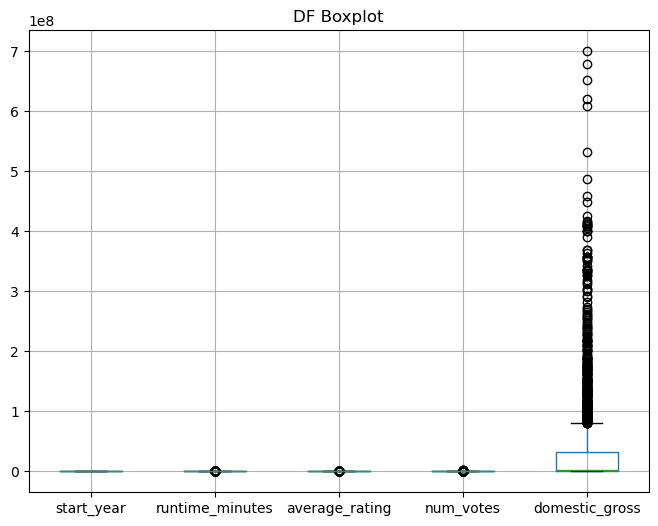

In [128]:
plt.figure(figsize=(8,6))
df.boxplot()
plt.title('DF Boxplot')

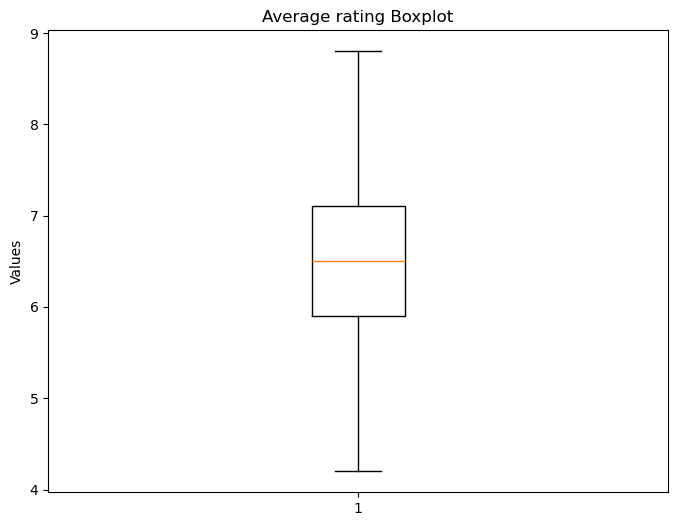

In [146]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(df1['average_rating'])  # Replace 'specific_column' with the column you want to plot
plt.title('Average rating Boxplot')  # Add a title
plt.ylabel('Values')  # Add label for y-axis
plt.show()

In [147]:
#create a function to drop outliers using IQR
def drop_outliers_IQR(df,columns):
    new_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

    return new_df

# Find the outliers in the num_votes column using the IQR function created
columns_to_remove_outliers = ['average_rating', 'num_votes','runtime_minutes','domestic_gross']
df1 =drop_outliers_IQR(df,columns_to_remove_outliers)

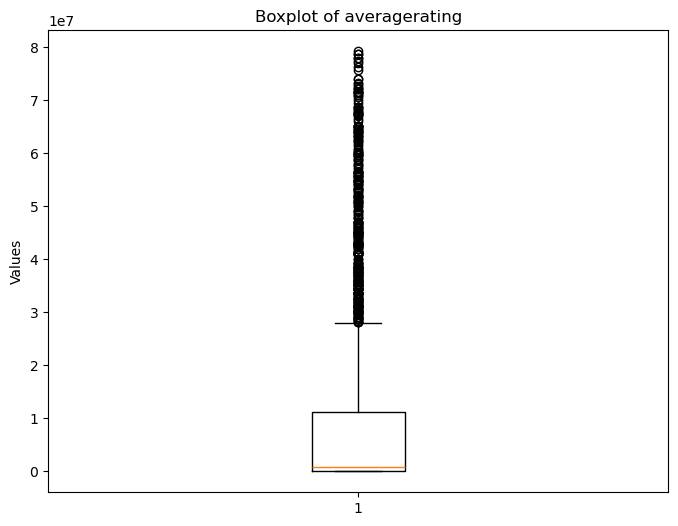

In [152]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(df1['domestic_gross'])  # Replace 'specific_column' with the column you want to plot
plt.title('Boxplot of averagerating')  # Add a title
plt.ylabel('Values')  # Add label for y-axis
plt.show()

Text(0.5, 1.0, 'DF Boxplot')

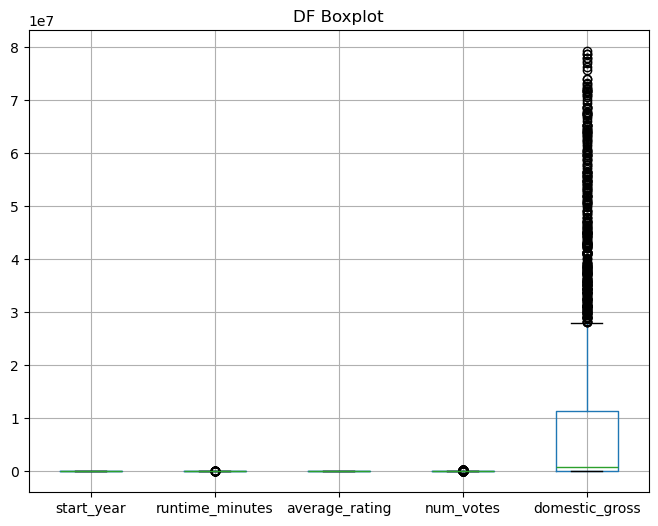

In [132]:
plt.figure(figsize=(8,6))
df1.boxplot()
plt.title('DF Boxplot')

In [ ]:
df1.nunique()

## Feature engineering

In [171]:
#Using average rating to generate new columns
# Define the bins and labels for the rating
bins = [0, 2, 4, 6, 8, 10]
labels = ['Poor', 'Fair', 'Average', 'Good', 'Excellent']

# Create a new column 'Rating' by grouping values into the specified bins
df1['Rating'] = pd.cut(df1['average_rating'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
df1.head(5)

,tconst,primary_title,start_year,runtime_minutes,genres,average_rating,num_votes,domestic_gross,foreign_gross,Rating
24,tt1220634,Resident Evil: Afterlife,2010.0,96.0,"Action,Adventure,Horror",5.9,153270,60100000.0,240100000,Average
33,tt1320261,Gulliver's Travels,2010.0,85.0,"Adventure,Comedy,Family",4.9,61178,42800000.0,194600000,Average
37,tt0963966,The Sorcerer's Apprentice,2010.0,109.0,"Action,Adventure,Family",6.1,143862,63200000.0,152100000,Good
56,tt1219342,Legend of the Guardians: The Owls of Ga'Hoole,2010.0,97.0,"Action,Adventure,Animation",7.0,73790,55700000.0,84400000,Good
57,tt0780653,The Wolfman,2010.0,103.0,"Drama,Fantasy,Horror",5.8,97873,62000000.0,77800000,Average


## Exploratory Data Analysis

In [134]:
df1.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross
count,2355.000000,2355.000000,2355.000000,2355.000000,2.355000e+03
mean,2013.806369,105.455626,6.451762,26168.632272,9.836428e+06
std,2.455008,16.470386,0.836218,35110.276273,1.728880e+07
min,2010.000000,58.000000,4.200000,5.000000,0.000000e+00
25%,2012.000000,94.000000,5.900000,2095.000000,8.500000e+04
50%,2014.000000,103.000000,6.500000,9835.000000,8.000000e+05
75%,2016.000000,115.000000,7.100000,36870.500000,1.125000e+07
max,2019.000000,154.000000,8.800000,160534.000000,7.920000e+07


In [172]:
# Group by Genre and calculate the mean rating
group_merged = df1.groupby('genres')[['average_rating','num_votes','domestic_gross']].mean().reset_index()

# Sort by average rating in descending order
sort_group_merged = group_merged.sort_values(by='average_rating', ascending=False)

# Select the top 20 genres
top_20_genres = sort_group_merged.head(20)
top_20_genres

,genres,average_rating,num_votes,domestic_gross
223,"Documentary,News",8.300000,30.000000,1.910000e+05
131,"Biography,Documentary,Family",8.300000,18.000000,2.450000e+04
224,"Documentary,Sport",8.200000,32250.000000,1.750000e+07
119,"Animation,Drama,Romance",8.200000,24863.000000,3.100000e+05
136,"Biography,Documentary,Thriller",8.100000,47994.000000,2.800000e+06
167,"Comedy,Drama,Thriller",8.100000,151123.000000,3.100000e+06
210,"Documentary,Drama,History",8.100000,7998.000000,1.500000e+06
149,"Comedy,Crime,Documentary",8.000000,58721.000000,3.300000e+06
219,"Documentary,History,War",8.000000,7827.500000,9.055500e+06
117,"Animation,Drama,Fantasy",7.950000,102250.000000,4.350000e+06


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


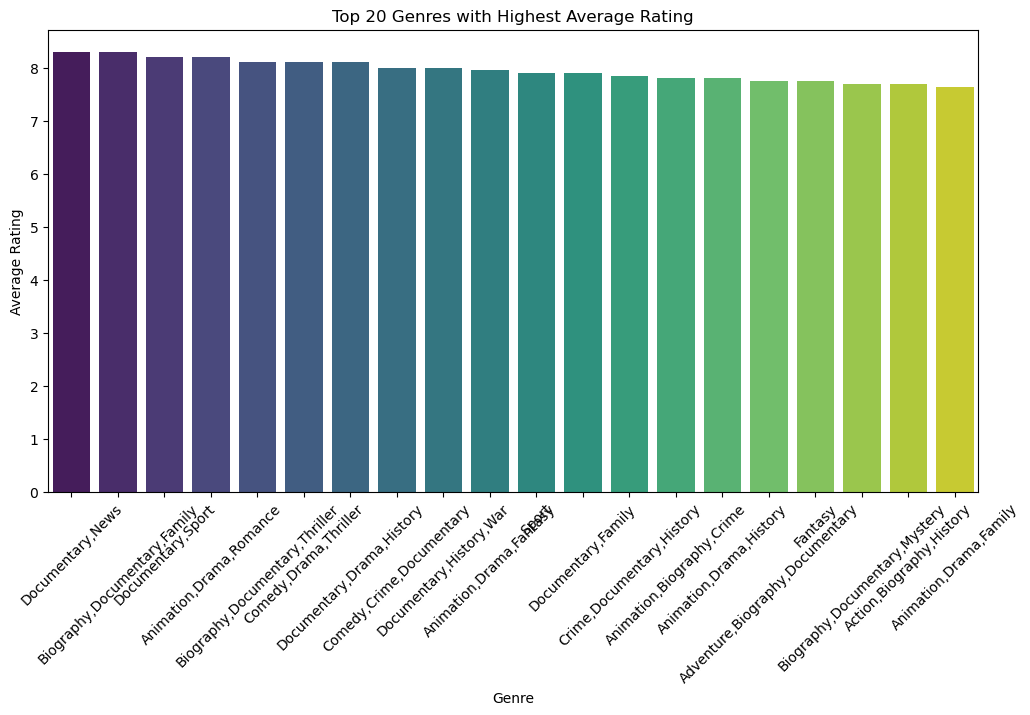

In [136]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='average_rating', data=top_20_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 20 Genres with Highest Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### This bar graph shows that for the top twenty movies, the movies that were rated the highest were mostly documentary movies 

In [177]:
# Group by Genre and calculate the mean rating
group_merged2 = df1.groupby('genres')['num_votes'].mean().reset_index()

# Sort by number of votes in descending order
sort_group_merged_votes = group_merged2.sort_values(by='num_votes', ascending=False)

# Select the top 20 genres
top_20_genres_votes = sort_group_merged_votes.head(20)
top_20_genres_votes


,genres,num_votes
188,"Comedy,Western",160534.000000
167,"Comedy,Drama,Thriller",151123.000000
18,"Action,Biography,Comedy",131043.000000
100,"Adventure,Fantasy",123127.000000
232,"Drama,Fantasy,Music",107625.000000
176,"Comedy,Horror",103813.000000
117,"Animation,Drama,Fantasy",102250.000000
56,"Action,Fantasy,Thriller",96905.500000
278,"Horror,Mystery",95637.000000
277,"Horror,Music,Thriller",90773.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


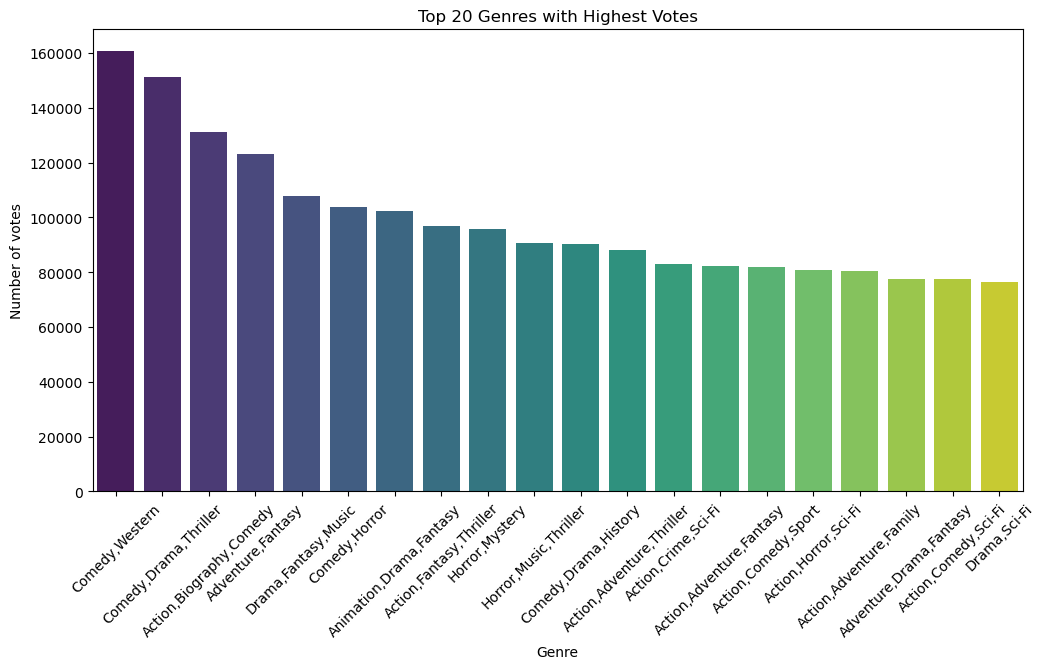

In [197]:
#top_20_genres.plot.bar(x ='genres', y = 'average_rating' )
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='num_votes', data=top_20_genres_votes, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Number of votes')
plt.title('Top 20 Genres with Highest Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [184]:
# Group by Genre and calculate the mean rating
group_merged3 = df1.groupby('genres')['domestic_gross'].mean().reset_index()

# Sort by number of votes in descending order
sort_group_merged_dgross = group_merged3.sort_values(by='domestic_gross', ascending=False)

# Select the top 20 genres
top_20_genres_dgross = sort_group_merged_dgross.head(20)
top_20_genres_dgross

,genres,domestic_gross
14,"Action,Animation,Comedy",7.390000e+07
100,"Adventure,Fantasy",6.520000e+07
98,"Adventure,Family,Fantasy",6.400000e+07
170,"Comedy,Family,Fantasy",5.240000e+07
18,"Action,Biography,Comedy",5.130000e+07
232,"Drama,Fantasy,Music",5.050000e+07
62,"Action,Horror,Sci-Fi",4.895000e+07
138,"Biography,Drama,Family",4.637500e+07
82,"Adventure,Comedy,Romance",4.600000e+07
31,"Action,Comedy,Sport",4.530000e+07


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


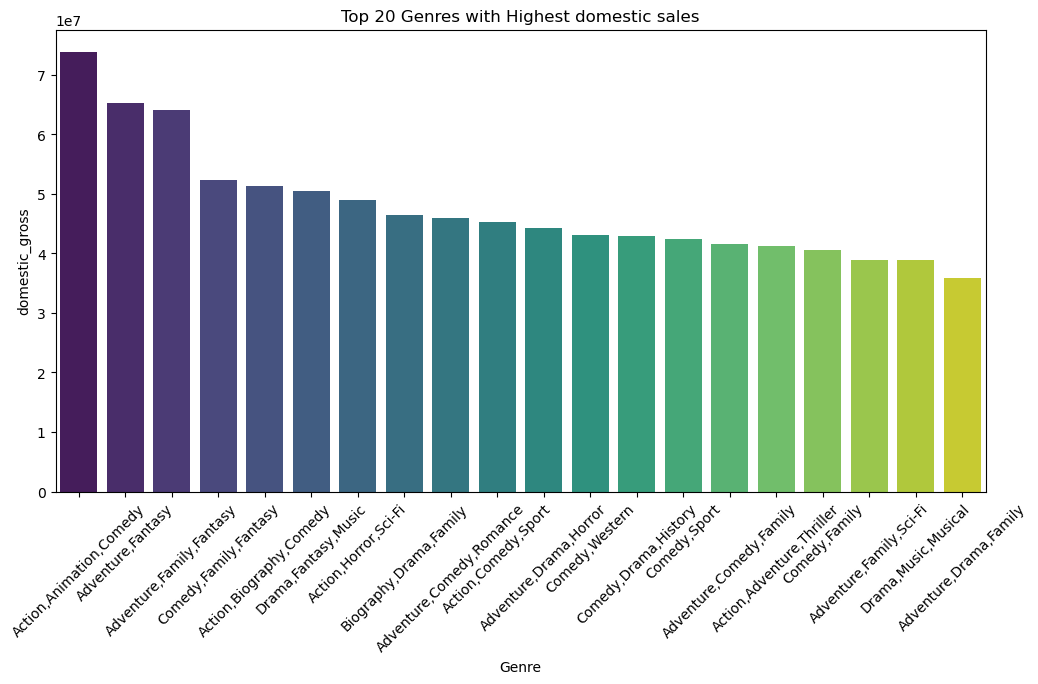

In [196]:
# Check the number of votes to analyse the movie with the  votes 
#top_20_genres.plot.bar(x ='genres', y = 'domestic_gross' )
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='domestic_gross', data=top_20_genres_dgross, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('domestic_gross')
plt.title('Top 20 Genres with Highest domestic sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<Figure size 300x200 with 0 Axes>

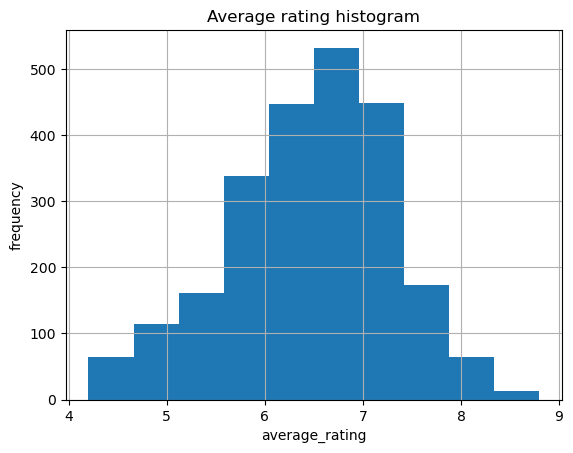

<Figure size 300x200 with 0 Axes>

In [191]:
# We shall plot a plot with histograms

df1['average_rating'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('average_rating')
plt.title('Average rating histogram')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

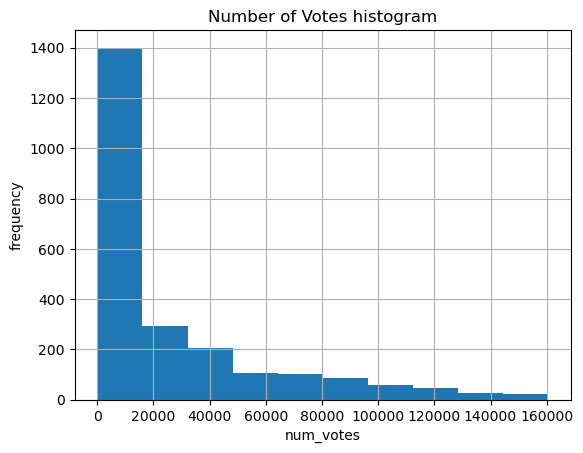

<Figure size 300x200 with 0 Axes>

In [192]:
#We shall plot a plot with histograms

df1['num_votes'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('num_votes')
plt.title('Number of Votes histogram')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

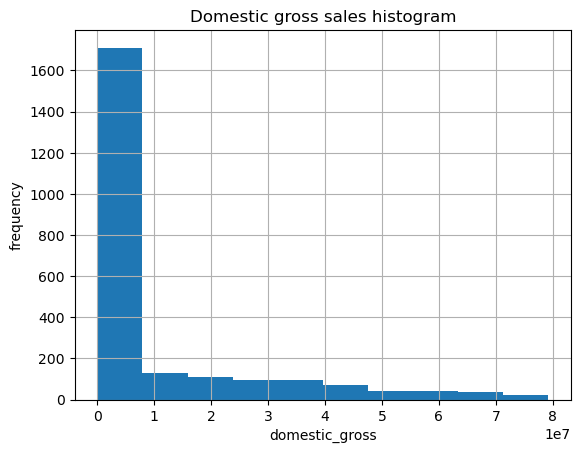

<Figure size 300x200 with 0 Axes>

In [193]:
#We shall plot a plot with histograms

df1['domestic_gross'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('domestic_gross')
plt.title('Domestic gross sales histogram')
plt.figure(figsize=(3, 2))

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

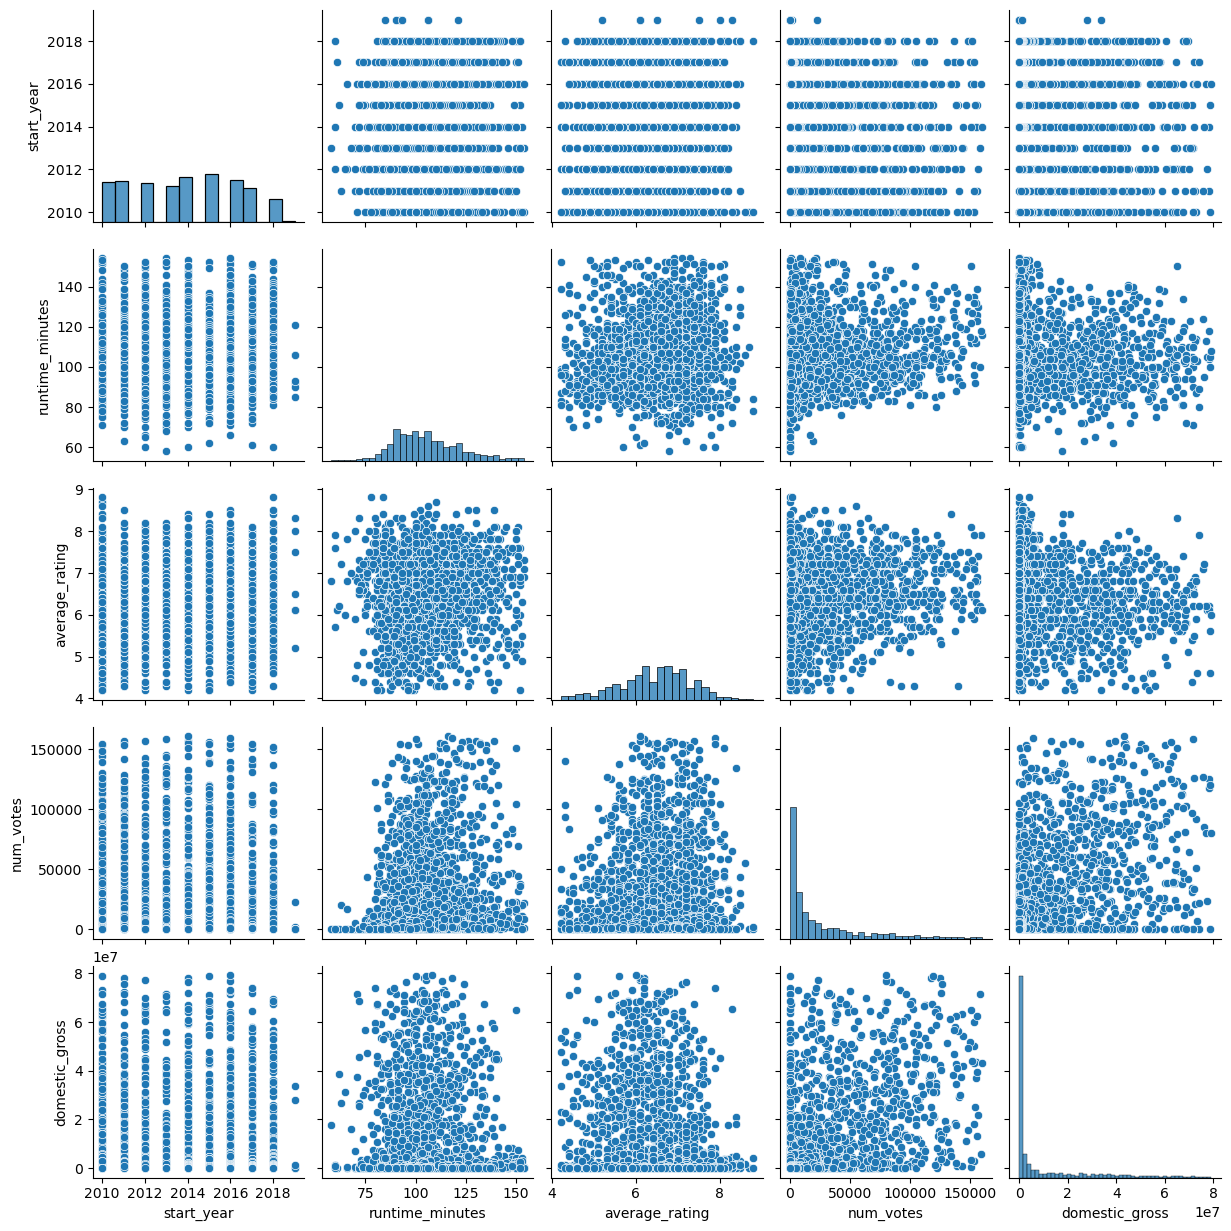

In [186]:
sns.pairplot(df1) #hue= 'average_rating', diag_kind="hist", markers=["o", "s"])

### Conclusion

### This analysis leads to three recommendations regarding types of movies that are successful:-

### The movies with genre combination of action, animation and comedy had the highest domestic gross sales hence this is the first type of movie to produce for more sales. Movies with fantasy also appeared to be predominant in the top 20 movies with highest sales,this can be considered also as an alternative for more sales. 
### Movies in the top 20 votes had slightly different results with genres comedy, action and scifi being dominant. Movies with a genre combination of documentary appeared to top the list in this category.
### Adventure genre is constant in all the above graphs for the top 20 so must be considered a key element of any movie to be produced.
### Limitations-Features such as number of viewers and targeted audience should be added in the future for better analysis. The classification of the genres should also be improved for better results.